
**Dataset**: https://www.kaggle.com/datasets/ethancratchley/email-phishing-dataset

Loading The Dataset

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
dataset = pd.read_csv("email_phishing_data.csv")
dataset

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
524841,782,327,301,2,2,2,52,1,0
524842,36,30,11,0,0,0,4,0,1
524843,61,46,11,0,0,0,3,0,0
524844,213,136,89,0,0,0,18,0,0


## Descrição dos dados:

In [127]:
dataset.dtypes

num_words              int64
num_unique_words       int64
num_stopwords          int64
num_links              int64
num_unique_domains     int64
num_email_addresses    int64
num_spelling_errors    int64
num_urgent_keywords    int64
label                  int64
dtype: object

O fato de serem todos atributos numéricos facilita a análise e construção dos modelos, já que não será necessário converter atributos categóricos para numéricos.

In [128]:
pd.set_option('display.float_format', '{:.2f}'.format)
dataset.describe()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
count,524846.00,524846.00,524846.00,524846.00,524846.00,524846.00,524846.00,524846.00,524846.00
mean,276.23,123.01,80.05,0.90,0.35,2.11,24.69,0.25,0.01
std,3335.46,201.63,1023.33,5.60,1.77,13.59,311.31,0.56,0.11
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.00,38.00,12.00,0.00,0.00,0.00,2.00,0.00,0.00
50%,120.00,79.00,34.00,0.00,0.00,0.00,8.00,0.00,0.00
75%,269.00,145.00,79.00,0.00,0.00,1.00,22.00,0.00,0.00
max,2339682.00,51251.00,720411.00,824.00,524.00,1150.00,190104.00,7.00,1.00


Como é possível observar pelo valor de max, existe um outlier com um número muito grande de palavras (mais de 2 milhões), que não faz sentido no contexto analisado. Vejamos a seguir os 10 emails com mais palavras para fazer uma comparação:

In [129]:
print("10 valores mais altos de num_words:")
print(dataset['num_words'].sort_values(ascending=False).head(10))

print("--- ---")
#gets .99 quantile
print("99% das mensagens tem menos que:")
print(str(dataset['num_words'].quantile(0.99))+" palavras")

10 valores mais altos de num_words:
518898    2339682
111750     103407
357879     101796
316618      63501
316072      55145
316615      49961
316164      46124
316178      45654
254930      42844
74046       41250
Name: num_words, dtype: int64
--- ---
99% das mensagens tem menos que:
2301.0 palavras


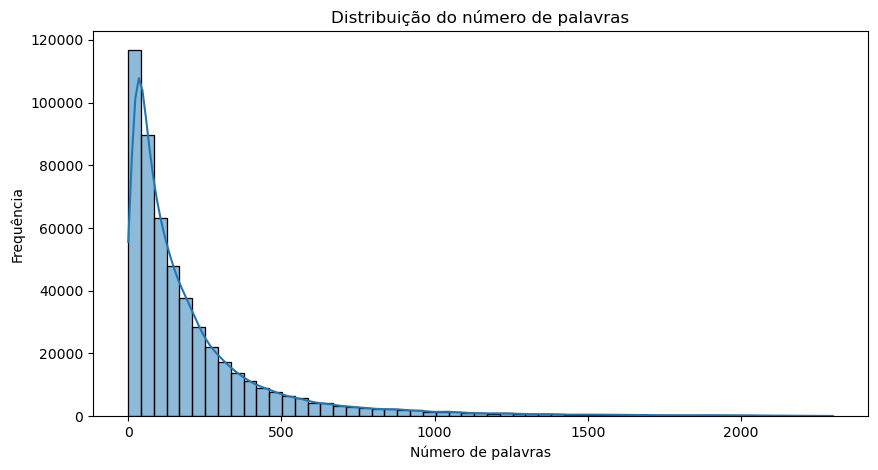

In [147]:
# removes the 1% outliers
dataset_for_histogram = dataset[dataset['num_words'] < dataset['num_words'].quantile(0.99)]

# TODO escolher os 99%?

# plots the histogram
plt.figure(figsize=(10, 5))
plt.title("Distribuição do número de palavras")
plt.xlabel("Número de palavras")
plt.ylabel("Frequência")
sns.histplot(dataset_for_histogram['num_words'], bins=55, kde=True)
plt.show()

Agora, temos o seguinte:

In [148]:
dataset_for_histogram.describe()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
count,519595.00,519595.00,519595.00,519595.00,519595.00,519595.00,519595.00,519595.00,519595.00
mean,217.37,110.63,63.63,0.70,0.29,2.01,20.13,0.23,0.01
std,290.47,111.58,87.88,3.86,0.92,11.62,39.71,0.51,0.11
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.00,37.00,12.00,0.00,0.00,0.00,2.00,0.00,0.00
50%,118.00,78.00,33.00,0.00,0.00,0.00,8.00,0.00,0.00
75%,261.00,142.00,77.00,0.00,0.00,1.00,22.00,0.00,0.00
max,2300.00,1452.00,942.00,187.00,46.00,589.00,1576.00,5.00,1.00


## Tipos de dados:

## Verificação de desbalanceamento

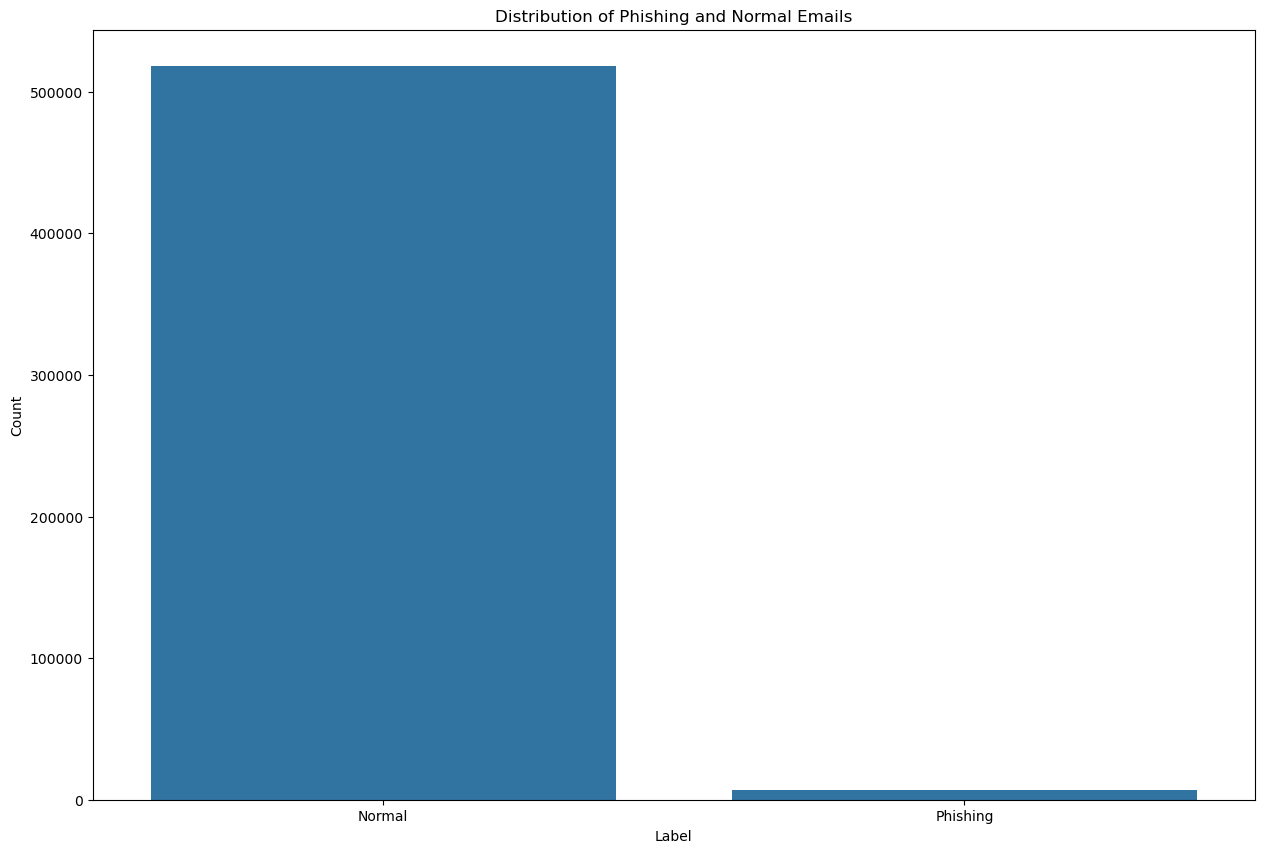

In [149]:
plt.figure(figsize=(15, 10))

sns.countplot(x='label', data=dataset)
plt.title('Distribution of Phishing and Normal Emails')

plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Phishing'])
plt.show()

In [133]:
counts = dataset['label'].value_counts()
print(f"Emails normais: {counts[0]}")
print(f"Emails de phishing: {counts[1]}")
print(dataset['label'].value_counts(normalize=True) * 100)

Emails normais: 517897
Emails de phishing: 6949
label
0   98.68
1    1.32
Name: proportion, dtype: float64


Percebe-se que os dados estão bastante desbalanceados, com apenas pouco mais de 1% pertencendo à classe "Phishing". Para que os modelos possam ser treinados corretamente, devemos balancear esses dados, o que pode ser feito tanto por undersampling (reduzindo a classe majoritária) ou oversampling (aumentando a classe minoritária). No nosso caso, escolheremos o método de undersampling para o overfitting de dados que seria causada pelo oversampling.

Emails normais: 517897
Emails de phishing: 6949


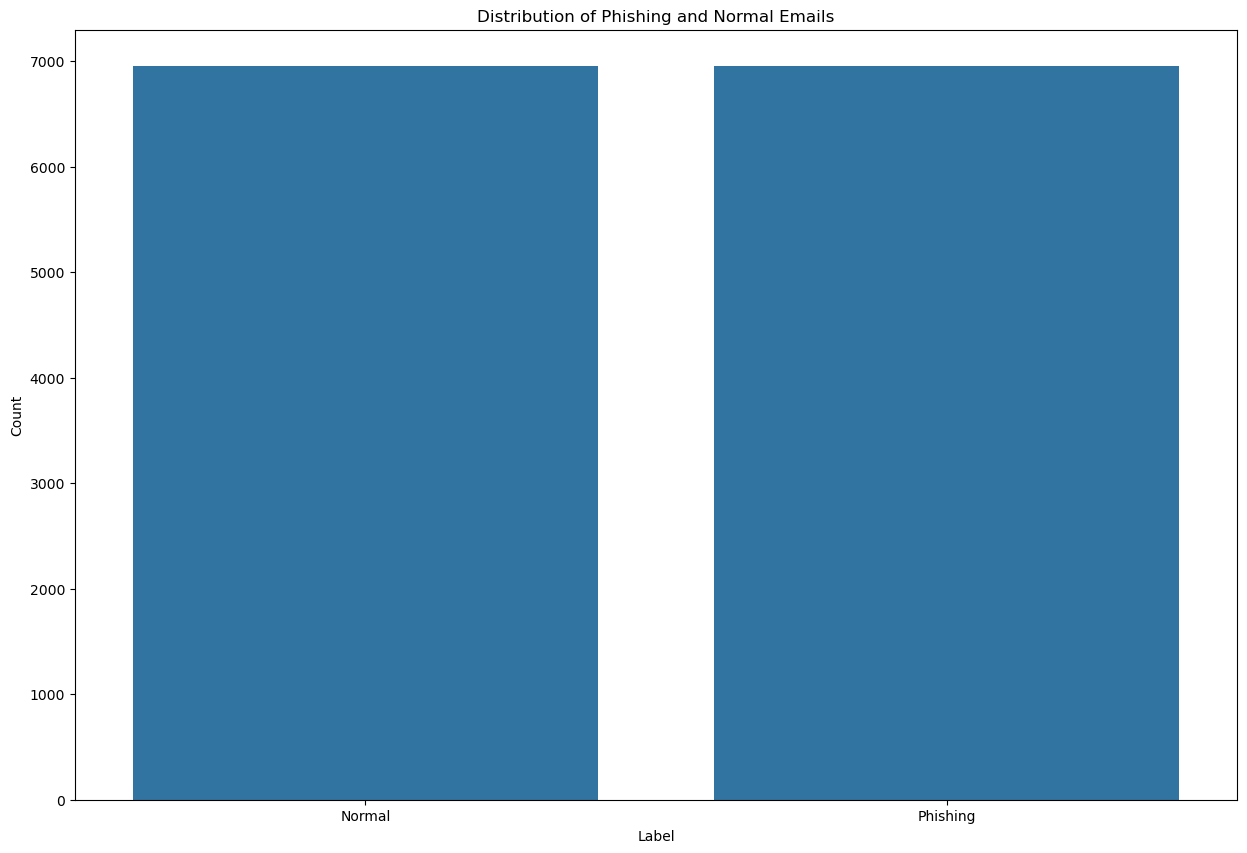

In [150]:
normal_emails = dataset[dataset['label'] == 0]
phishing_emails = dataset[dataset['label'] == 1]
print(f"Emails normais: {len(normal_emails)}")
print(f"Emails de phishing: {len(phishing_emails)}")

# balancea os dois conjuntos
normal_emails_balanced = normal_emails.sample(len(phishing_emails), random_state=42)

# Junta os conjuntos balanceados e embaralha os valores 
balanced_dataset = pd.concat([normal_emails_balanced, phishing_emails]).sample(frac=1, random_state=42).reset_index(drop=True)

plt.figure(figsize=(15, 10))
sns.countplot(x='label', data=balanced_dataset)
plt.title('Distribution of Phishing and Normal Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Phishing'])
plt.show()

# Testando métodos

In [151]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [152]:
# Define o k-fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Split de dados de treino e teste
# 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(balanced_dataset.drop(columns=['label']), balanced_dataset['label'], test_size=0.2, random_state=42)

In [177]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

knn_pipeline.fit(X_train, y_train)

# get test set predictions
y_pred_knn = knn_pipeline.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1384
           1       0.74      0.79      0.77      1396

    accuracy                           0.76      2780
   macro avg       0.76      0.76      0.76      2780
weighted avg       0.76      0.76      0.76      2780

KNN Confusion Matrix:
[[1006  378]
 [ 293 1103]]


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# fits the model
logreg_pipeline.fit(X_train, y_train)

# get test set predictions
y_pred_logreg = logreg_pipeline.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.55      0.60      1384
           1       0.62      0.73      0.67      1396

    accuracy                           0.64      2780
   macro avg       0.64      0.64      0.64      2780
weighted avg       0.64      0.64      0.64      2780

KNN Confusion Matrix:
[[ 755  629]
 [ 373 1023]]


In [183]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

# get test set predictions
y_pred_rf = logreg_pipeline.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.55      0.60      1384
           1       0.62      0.73      0.67      1396

    accuracy                           0.64      2780
   macro avg       0.64      0.64      0.64      2780
weighted avg       0.64      0.64      0.64      2780

Random Forest Confusion Matrix:
[[ 755  629]
 [ 373 1023]]
